In [137]:
import pandas as pd


* Algumas constantes

In [138]:
area_cerrado_maranhense = 217029
area_cerrado_maranhense

217029

In [139]:
area_estado_ma = 329651
area_estado_ma

329651

In [140]:
area_cerrado_maranhense/ area_estado_ma

0.6583599018355776

## Carregando os dados

In [141]:
df = pd.read_csv('dados/csv/terrabrasilis_cerrado_5_18_2024,_11_26_39 AM.csv')
df.head()

,year,areakm,municipality,geocode_ibge,state
0,2000,42.515084,Afonso Cunha,2100105,Maranhão
1,2001,1.687509,Afonso Cunha,2100105,Maranhão
2,2002,1.687509,Afonso Cunha,2100105,Maranhão
3,2003,3.922876,Afonso Cunha,2100105,Maranhão
4,2004,3.922876,Afonso Cunha,2100105,Maranhão


* Para quais anos temos dados ?

In [142]:
df["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

## Algumas perguntas inicias, sobre o desmatamento absoluto e relativo

* Qual o total de desmatamento no bioma ?

In [143]:
total_desmatamento = df["areakm"].sum()
print( total_desmatamento, total_desmatamento / area_cerrado_maranhense)

89880.3660872508 0.4141398895412632


* Qual o total de desmatamento no bioma, na mascara de 2000 ?

In [144]:
total_desmatamento_00 = df[df["year"] == 2000]["areakm"].sum()
print( total_desmatamento_00, total_desmatamento_00 / area_cerrado_maranhense)

41356.95237303544 0.19055956749114378


* Qual o total de desmatamento no bioma, de 2001 a 2023 ?

In [145]:
total_desmatamento_01_23 = df[df["year"] != 2000]["areakm"].sum()
print( total_desmatamento_01_23, total_desmatamento_01_23 / area_cerrado_maranhense)

48523.41371421536 0.2235803220501194


## Visualizando a evolução do desmatamento no bioma

In [146]:
df_por_ano = df.groupby("year")["areakm"].sum().reset_index().set_index("year")
df_por_ano

,areakm
year,
2000,41356.952373
2001,2338.595392
2002,2338.595392
2003,2908.182797
2004,2908.182797
2005,2431.024448
2006,2431.024448
2007,2961.520519
2008,2961.520519


In [147]:
df_por_ano["Percentual do Bioma"] = df_por_ano["areakm"] / area_cerrado_maranhense
df_por_ano

,areakm,Percentual do Bioma
year,,
2000,41356.952373,0.190560
2001,2338.595392,0.010775
2002,2338.595392,0.010775
2003,2908.182797,0.013400
2004,2908.182797,0.013400
2005,2431.024448,0.011201
2006,2431.024448,0.011201
2007,2961.520519,0.013646
2008,2961.520519,0.013646


* variação, ou aceleração

In [148]:
aceleracao_desmatamento = df_por_ano.pct_change().drop([2000, 2001]) * 100
aceleracao_desmatamento.head()

,areakm,Percentual do Bioma
year,,
2002,0.000000,0.000000
2003,24.355962,24.355962
2004,0.000000,0.000000
2005,-16.407440,-16.407440
2006,0.000000,0.000000


In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

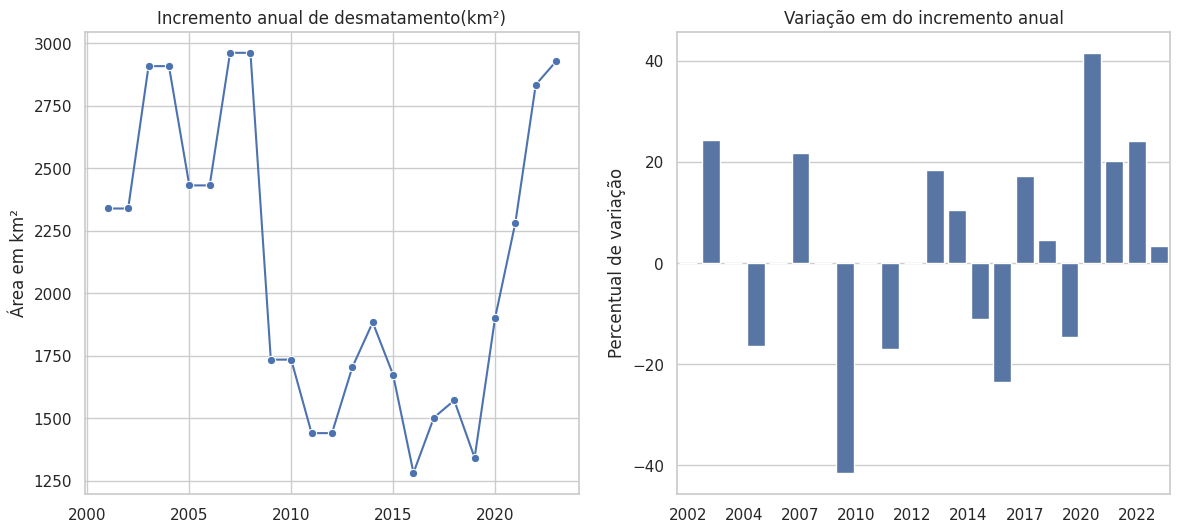

In [150]:
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.lineplot(ax=axs[0], x='year', y='areakm', data=df_por_ano.drop(2000), marker='o', legend=False)

axs[0].set_title('Incremento anual de desmatamento(km²)')
axs[0].set_xlabel('')
axs[0].set_ylabel('Área em km²')


sns.barplot(ax=axs[1], x='year', y='areakm', data=aceleracao_desmatamento, )
axs[1].xaxis.set_major_locator(plt.AutoLocator())

axs[1].set(title='Variação em do incremento anual', xlabel='', ylabel='Percentual de variação')


plt.show()


## Visualizando por municipio

### Preparando o dado

* agrupar por municipio

In [151]:
df_por_mun = df.groupby(["geocode_ibge","municipality","year"])["areakm"].first().unstack().reset_index().set_index("geocode_ibge")
df_por_mun.index.name = "geocode"
df_por_mun.head()

year,municipality,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
geocode,,,,,,,,,,,,,,,,,,,,,
2100105,Afonso Cunha,42.515084,1.687509,1.687509,3.922876,3.922876,1.355789,1.355789,3.786717,3.786717,...,0.984561,8.254625,5.729277,18.178811,6.627577,8.303116,7.185932,3.296597,2.747247,4.186628
2100154,Água Doce do Maranhão,64.003850,8.968045,8.968045,18.288683,18.288683,10.526301,10.526301,10.479238,10.479238,...,5.720458,4.226481,6.334058,4.823428,8.401773,4.966519,4.668220,3.145991,3.628249,2.505242
2100303,Aldeias Altas,93.311739,14.068892,14.068892,24.528664,24.528664,25.203367,25.203367,43.636436,43.636436,...,8.372906,9.312877,3.497253,6.984161,8.742854,12.293774,11.907539,85.203531,99.131740,54.036724
2100436,Alto Alegre do Maranhão,278.668521,4.362173,4.362173,8.383284,8.383284,3.197358,3.197358,4.355761,4.355761,...,1.662265,3.000325,0.162847,1.073610,1.061967,1.564407,0.905481,0.374098,1.686070,1.541568
2100501,Alto Parnaíba,509.572054,32.030547,32.030547,63.398056,63.398056,18.698535,18.698535,88.091243,88.091243,...,13.133912,33.036303,59.569205,81.909833,17.098499,30.587533,38.870550,55.979650,141.030410,255.546576


In [152]:
import geopandas as gpd

* Carregando os dados espaciais

In [153]:
gdf_mun = gpd.read_file("dados/limites/MA_Municipios_2022.zip")
gdf_mun.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2100055,Açailândia,MA,5805.159,"POLYGON ((-47.40208 -5.03469, -47.47673 -5.046..."
1,2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223..."
2,2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844..."
3,2100204,Alcântara,MA,1167.964,"MULTIPOLYGON (((-44.57175 -2.21957, -44.56274 ..."
4,2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644..."


* para integrar os dados, vamos precisar que os tipos das colunas sejam iguais

In [154]:
gdf_mun["CD_MUN"]

0      2100055
1      2100105
2      2100154
3      2100204
4      2100303
        ...   
212    2112803
213    2112852
214    2112902
215    2113009
216    2114007
Name: CD_MUN, Length: 217, dtype: object

In [155]:
df_por_mun.index

Index([2100105, 2100154, 2100303, 2100436, 2100501, 2100600, 2100709, 2100808,
       2100907, 2100956,
       ...
       2111904, 2111953, 2112001, 2112100, 2112209, 2112233, 2112308, 2112506,
       2112605, 2112704],
      dtype='int64', name='geocode', length=139)

In [156]:
gdf_mun["CD_MUN"] = gdf_mun["CD_MUN"].astype('int64')
gdf_mun.set_index("CD_MUN", inplace=True)
gdf_mun.head()


,NM_MUN,SIGLA_UF,AREA_KM2,geometry
CD_MUN,,,,
2100055,Açailândia,MA,5805.159,"POLYGON ((-47.40208 -5.03469, -47.47673 -5.046..."
2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223..."
2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844..."
2100204,Alcântara,MA,1167.964,"MULTIPOLYGON (((-44.57175 -2.21957, -44.56274 ..."
2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644..."


<Axes: >

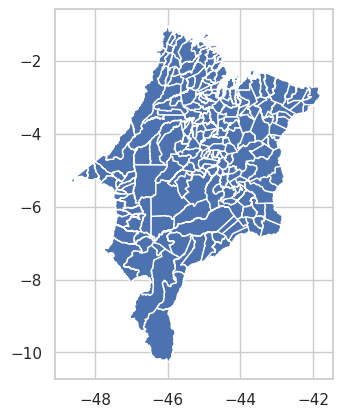

In [157]:
gdf_mun.plot()

* selecionar apenas os que temos dados, dentro do cerrado

In [158]:
gdf_mun_cerrado = gdf_mun.loc[df_por_mun.index]

<Axes: >

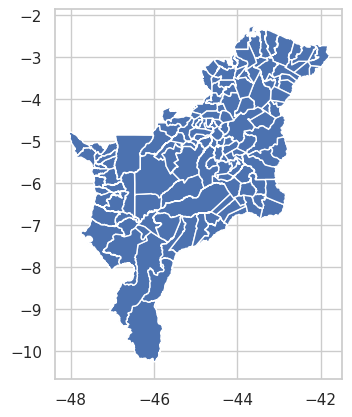

In [159]:
gdf_mun_cerrado.plot()

* incluir no dado geografico o desmatamento em km2 de 2000 e o percentual

In [160]:
gdf_mun_cerrado["D2000_km2"] = df_por_mun[2000]
gdf_mun_cerrado["D2000_Perc"] = df_por_mun[2000] / gdf_mun_cerrado["AREA_KM2"]
gdf_mun_cerrado.head(3)

,NM_MUN,SIGLA_UF,AREA_KM2,geometry,D2000_km2,D2000_Perc
geocode,,,,,,
2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223...",42.515084,0.114492
2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844...",64.003850,0.144709
2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644...",93.311739,0.048046


* desmatamento de 2001 a 2023

In [161]:
gdf_mun_cerrado["D2001-23_km2"] = df_por_mun[range(2001,2024)].sum(axis=1)
gdf_mun_cerrado["D2001-23_perc"] = gdf_mun_cerrado["D2001-23_km2"] / gdf_mun_cerrado["AREA_KM2"]
gdf_mun_cerrado.head(3)

,NM_MUN,SIGLA_UF,AREA_KM2,geometry,D2000_km2,D2000_Perc,D2001-23_km2,D2001-23_perc
geocode,,,,,,,,
2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223...",42.515084,0.114492,93.137045,0.250815
2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844...",64.003850,0.144709,168.707853,0.381440
2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644...",93.311739,0.048046,580.655785,0.298980


In [162]:
gdf_mun_cerrado["D2000-23_perc"] = gdf_mun_cerrado["D2001-23_perc"] + gdf_mun_cerrado["D2000_Perc"]
gdf_mun_cerrado.head(3)

,NM_MUN,SIGLA_UF,AREA_KM2,geometry,D2000_km2,D2000_Perc,D2001-23_km2,D2001-23_perc,D2000-23_perc
geocode,,,,,,,,,
2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223...",42.515084,0.114492,93.137045,0.250815,0.365306
2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844...",64.003850,0.144709,168.707853,0.381440,0.526149
2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644...",93.311739,0.048046,580.655785,0.298980,0.347027


In [163]:
gdf_mun_cerrado["D2000-23_km2"] = gdf_mun_cerrado["D2001-23_km2"] + gdf_mun_cerrado["D2000_km2"]
gdf_mun_cerrado.head(3)

,NM_MUN,SIGLA_UF,AREA_KM2,geometry,D2000_km2,D2000_Perc,D2001-23_km2,D2001-23_perc,D2000-23_perc,D2000-23_km2
geocode,,,,,,,,,,
2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223...",42.515084,0.114492,93.137045,0.250815,0.365306,135.652129
2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844...",64.003850,0.144709,168.707853,0.381440,0.526149,232.711704
2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644...",93.311739,0.048046,580.655785,0.298980,0.347027,673.967524


### Analisando o desmatamento absoluto

In [190]:
gdf_mun_top20_absoluto = gdf_mun_cerrado.sort_values("D2000-23_km2", ascending=False).head(20)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2"]].set_index("NM_MUN")
gdf_mun_top20_absoluto

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2
NM_MUN,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378
Grajaú,8861.717,1213.262746,3782.748359,2569.485612
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300
Codó,4361.606,1459.123108,2637.282986,1178.159878
Tuntum,3369.121,1182.845876,2189.909659,1007.063782
Riachão,6402.830,625.418194,2161.431611,1536.013417
Amarante do Maranhão,7439.615,1079.302987,1927.195891,847.892904
Parnarama,3245.525,529.145459,1809.032703,1279.887244
Alto Parnaíba,11127.384,509.572054,1808.901986,1299.329932


In [191]:
gdf_mun_top20_absoluto["Variação (%)"] = gdf_mun_top20_absoluto["D2001-23_km2"] / gdf_mun_top20_absoluto["D2000_km2"]
gdf_mun_top20_absoluto.head()

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,Variação (%)
NM_MUN,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391


In [205]:
gdf_mun_top20_absoluto.columns = ["Área do município","2000","2023","D2001-23_km2","Variação (%)"]
gdf_mun_top20_absoluto.index.name = "Município"

In [206]:
s_top20_absoluto = gdf_mun_top20_absoluto.drop("D2001-23_km2", axis=1).style
s_top20_absoluto

,Área do município,2000,2023,Variação (%)
Município,,,,
Balsas,13141.162000,1712.366997,5292.880375,2.090973
Grajaú,8861.717000,1213.262746,3782.748359,2.117831
Barra do Corda,5187.673000,2080.920096,3079.388397,0.479821
Codó,4361.606000,1459.123108,2637.282986,0.807444
Tuntum,3369.121000,1182.845876,2189.909659,0.851391
Riachão,6402.830000,625.418194,2161.431611,2.455978
Amarante do Maranhão,7439.615000,1079.302987,1927.195891,0.785593
Parnarama,3245.525000,529.145459,1809.032703,2.418781
Alto Parnaíba,11127.384000,509.572054,1808.901986,2.549845


In [195]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [207]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top20_absoluto.format({
        'Área do município':formatar_valor,
        '2000' : formatar_valor,
        '2023' : formatar_valor,
        'Variação':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000,2023,Variação (%)
Município,,,,
Balsas,"13.141,2","1.712,4","5.292,9",2.090973
Grajaú,"8.861,7","1.213,3","3.782,7",2.117831
Barra do Corda,"5.187,7","2.080,9","3.079,4",0.479821
Codó,"4.361,6","1.459,1","2.637,3",0.807444
Tuntum,"3.369,1","1.182,8","2.189,9",0.851391
Riachão,"6.402,8","625,4","2.161,4",2.455978
Amarante do Maranhão,"7.439,6","1.079,3","1.927,2",0.785593
Parnarama,"3.245,5","529,1","1.809,0",2.418781
Alto Parnaíba,"11.127,4","509,6","1.808,9",2.549845


In [208]:
table = s_top20_absoluto.to_html()

In [209]:
print (table)

<style type="text/css">
#T_3a6fc_row0_col0, #T_3a6fc_row0_col2, #T_3a6fc_row2_col1, #T_3a6fc_row17_col3 {
  background-color: darkgray;
}
#T_3a6fc_row17_col1, #T_3a6fc_row18_col0, #T_3a6fc_row18_col3, #T_3a6fc_row19_col2 {
  background-color: lightgray;
}
</style>
<table id="T_3a6fc">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_3a6fc_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_3a6fc_level0_col1" class="col_heading level0 col1" >2000</th>
      <th id="T_3a6fc_level0_col2" class="col_heading level0 col2" >2023</th>
      <th id="T_3a6fc_level0_col3" class="col_heading level0 col3" >Variação (%)</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
      <th class="blank col3" >&nbsp;</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_3a6fc_level0_row0" clas